In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Spotify_Youtube.csv')

In [3]:
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [84]:
def check_df(data, head=5):
    print('####### columns #######')
    print(data.columns)
    print('####### head #########')
    print(data.head(head))
    print('######### shape ##########')
    print(data.shape)
    print('######## ndim ###########')
    print(data.ndim)
    print('######## info #########')
    print(data.info())
    print('######## isnull ##########')
    print(data.isnull().sum().sum())
    print('######### describe #######')
    print(data.describe().T)
    print('######### tail ###########')
    print(data.tail(head))

check_df(df)

####### columns #######
Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')
####### head #########
   Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                

In [85]:
def grab_col_name(datafr, cat_th=5, car_th=20):
    #category
    cat_cols=[col for col in datafr.columns if datafr[col].dtypes=='O']
    num_but_cat=[col for col in datafr.columns if datafr[col].nunique() < cat_th and datafr[col].dtypes !='O' ]
    cat_but_car=[col for col in datafr.columns if datafr[col].nunique() > car_th and datafr[col].dtypes =='O']
    cat_cols+=num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
    #number
    num_cols=[col for col in datafr.columns if datafr[col].dtypes !='O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
   
    print(f'Gozlem sayisi {datafr.shape[0]}')
    print(f'Deyisken sayisi {datafr.shape[1]}')
    print(f'categorik deyiskenler {len(cat_cols)}')
    print(f'number but categorik {len(num_but_cat)}')
    print(f'cardinal {len(cat_but_car)}')
    print(f'number {len(num_cols)}')
    
    return cat_cols, num_but_cat, cat_but_car ,num_cols

In [11]:
cat_cols, num_but_cat, cat_but_car ,num_cols=grab_col_name(df)

Gozlem sayisi 20718
Deyisken sayisi 28
categorik deyiskenler 3
number but categorik 0
cardinal 9
number 16


In [12]:
cat_cols

['Album_type', 'Licensed', 'official_video']

In [14]:
cat_but_car

['Artist',
 'Url_spotify',
 'Track',
 'Album',
 'Uri',
 'Url_youtube',
 'Title',
 'Channel',
 'Description']

In [15]:
num_cols

['Unnamed: 0',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Views',
 'Likes',
 'Comments',
 'Stream']

In [47]:
# Category
def cat_summary(datafr, category_cols):
    print(pd.DataFrame({category_cols: datafr[category_cols].value_counts(),
                       'Ratio': 100* datafr[category_cols].value_counts()/len(datafr)}))
    print('########################################################')


In [61]:
for col in cat_cols:
    cat_summary(df,col)

             Album_type      Ratio
Album_type                        
album             14926  72.043634
single             5004  24.152911
compilation         788   3.803456
########################################################
          Licensed      Ratio
Licensed                     
True         14140  68.249831
False         6108  29.481610
########################################################
                official_video      Ratio
official_video                           
True                     15723  75.890530
False                     4525  21.840911
########################################################


In [62]:
# Cardinal
for col in cat_but_car:
    cat_summary(df,col)

                        Artist     Ratio
Artist                                  
Gorillaz                    10  0.048267
Die drei !!!                10  0.048267
Hollywood Undead            10  0.048267
Empire of the Sun           10  0.048267
White Noise for Babies      10  0.048267
...                        ...       ...
NewJeans                     6  0.028960
Alfonso Herrera              6  0.028960
Jimin                        3  0.014480
Stars Music Chile            1  0.004827
Bootie Brown                 1  0.004827

[2079 rows x 2 columns]
########################################################
                                                    Url_spotify     Ratio
Url_spotify                                                              
https://open.spotify.com/artist/3AA28KZvwAUcZuO...           10  0.048267
https://open.spotify.com/artist/2Jc4AEeBTE47Kwu...           10  0.048267
https://open.spotify.com/artist/0CEFCo8288kQU7m...           10  0.048267
https://open.sp

In [55]:
# Numeric
def num_summary(dataframe, numerical_col):
    quantiles=[0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    print('#################################################')

In [56]:
for col in num_cols:
    num_summary(df,col)

count    20718.000000
mean     10358.500000
std       5980.915774
min          0.000000
5%        1035.850000
10%       2071.700000
20%       4143.400000
30%       6215.100000
40%       8286.800000
50%      10358.500000
60%      12430.200000
70%      14501.900000
80%      16573.600000
90%      18645.300000
95%      19681.150000
99%      20509.830000
max      20717.000000
Name: Unnamed: 0, dtype: float64
#################################################
count    20716.000000
mean         0.619777
std          0.165272
min          0.000000
5%           0.319000
10%          0.397000
20%          0.485000
30%          0.546000
40%          0.592000
50%          0.637000
60%          0.678000
70%          0.718000
80%          0.764000
90%          0.820000
95%          0.861000
99%          0.924000
max          0.975000
Name: Danceability, dtype: float64
#################################################
count    20716.000000
mean         0.635250
std          0.214147
min          0.000

In [77]:
# Missing Values
def missing_values(datafr):
    isnull=[col for col in datafr.columns if datafr[col].isnull().sum() > 0]
    na_sorts=datafr[isnull].isnull().sum().sort_values(ascending=False)
    ratio=(datafr[isnull].isnull().sum()/ datafr.shape[0] * 100)
    concat=pd.concat([na_sorts, np.round(ratio,3)], axis=1, keys=['Missing Values', 'Ratio'])
    print(concat)

In [78]:
missing_values(df)

                  Missing Values  Ratio
Description                  876  4.228
Stream                       576  2.780
Comments                     569  2.746
Likes                        541  2.611
Url_youtube                  470  2.269
official_video               470  2.269
Licensed                     470  2.269
Views                        470  2.269
Channel                      470  2.269
Title                        470  2.269
Danceability                   2  0.010
Energy                         2  0.010
Tempo                          2  0.010
Valence                        2  0.010
Liveness                       2  0.010
Instrumentalness               2  0.010
Acousticness                   2  0.010
Speechiness                    2  0.010
Loudness                       2  0.010
Key                            2  0.010
Duration_ms                    2  0.010


In [79]:
import seaborn as sns

<AxesSubplot:>

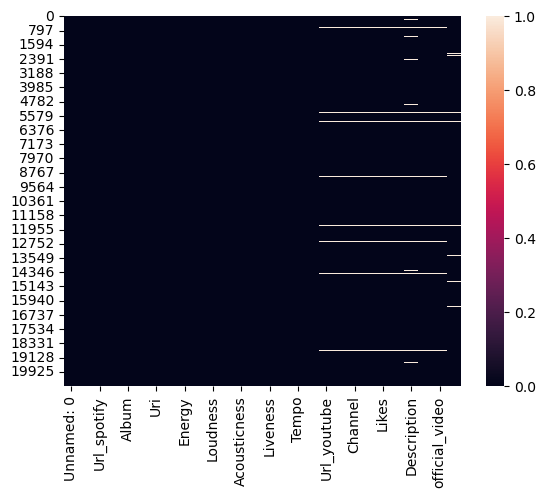

In [80]:
sns.heatmap(df.isnull())

In [81]:
df.fillna(0,inplace=True)

In [82]:
df.isnull()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

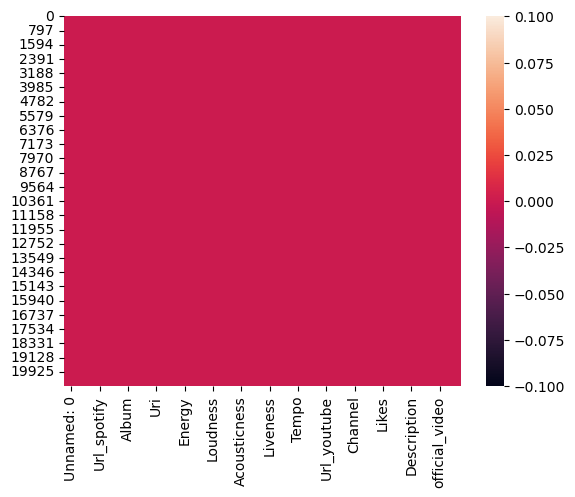

In [83]:
sns.heatmap(df.isnull())

In [86]:
print('object tipde olanlar' ,df.select_dtypes(include=['object']))

object tipde olanlar             Artist                                        Url_spotify  \
0         Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1         Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2         Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3         Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4         Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...            ...                                                ...   
20713  SICK LEGEND  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  SICK LEGEND  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  SICK LEGEND  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  SICK LEGEND  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  SICK LEGEND  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Goo

In [87]:
df['Artist'].value_counts()

Artist
Gorillaz                  10
Die drei !!!              10
Hollywood Undead          10
Empire of the Sun         10
White Noise for Babies    10
                          ..
NewJeans                   6
Alfonso Herrera            6
Jimin                      3
Stars Music Chile          1
Bootie Brown               1
Name: count, Length: 2079, dtype: int64

In [88]:
df['Album'].value_counts()

Album
Greatest Hits                                  30
Hamilton (Original Broadway Cast Recording)    29
Rebelde                                        25
Madvillainy                                    24
El Ultimo Adiós                                24
                                               ..
Wake Up Call                                    1
A Beautiful World                               1
Sex Therapy: The Session                        1
19 Dias Y 500 Noches                            1
MISS YOU HARDSTYLE                              1
Name: count, Length: 11937, dtype: int64

In [89]:
df[df['Album']=='Greatest Hits']

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
220,220,2Pac,https://open.spotify.com/artist/1ZwdS5xdxEREPy...,Hit 'Em Up - Single Version,Greatest Hits,compilation,spotify:track:0Z2J91b2iTGLVTZC4fKgxf,0.916,0.844,7.0,...,https://www.youtube.com/watch?v=41qC3w3UUkU,2Pac - Hit 'Em Up (Dirty) (Music Video) HD,Seven Hip-Hop,585712131.0,4363164.0,208460.0,Music video by 2Pac performing Hit 'Em Up (Dir...,False,False,375955728.0
222,222,2Pac,https://open.spotify.com/artist/1ZwdS5xdxEREPy...,California Love - Original Version,Greatest Hits,compilation,spotify:track:3ia3dJETSOllPsv3LJkE35,0.763,0.850,7.0,...,https://www.youtube.com/watch?v=omfz62qu_Bc,2Pac ft. Dr. Dre - California Love (Official V...,UPROXX Video,84654029.0,484619.0,12875.0,2Pac ft. Dr. Dre - California Love (Full Video...,False,False,497213287.0
225,225,2Pac,https://open.spotify.com/artist/1ZwdS5xdxEREPy...,Changes,Greatest Hits,compilation,spotify:track:1ofhfV90EnYhEr7Un2fWiv,0.865,0.665,7.0,...,https://www.youtube.com/watch?v=0_5XeetZf68,2pac - Changes Original Music Video,The Best,306542.0,4350.0,305.0,2pac - Changes Original Music Video,False,False,411056377.0
268,268,Fleetwood Mac,https://open.spotify.com/artist/08GQAI4eElDnRO...,Gypsy,Greatest Hits,compilation,spotify:track:19Ym5Sg0YyOCa6ao21bdoG,0.622,0.540,5.0,...,https://www.youtube.com/watch?v=mwgg1Pu6cNg,Fleetwood Mac - Gypsy (Official Music Video),Fleetwood Mac,81512369.0,436530.0,17764.0,You're watching the official music video for F...,True,True,213673856.0
1232,1232,Bruce Springsteen,https://open.spotify.com/artist/3eqjTLE0HfPfh7...,Streets of Philadelphia - Single Edit,Greatest Hits,compilation,spotify:track:3fbnbn6A5O5RNb08tlUEgd,0.741,0.290,5.0,...,https://www.youtube.com/watch?v=4z2DtNW79sQ,Bruce Springsteen - Streets of Philadelphia (O...,BruceSpringsteenVEVO,171514802.0,669935.0,25407.0,"Official Video of ”Streets Of Philadelphia"" by...",True,True,239663934.0
1236,1236,Bruce Springsteen,https://open.spotify.com/artist/3eqjTLE0HfPfh7...,Secret Garden,Greatest Hits,compilation,spotify:track:68uuz61IqrSJjO6ffO3yHc,0.520,0.329,0.0,...,https://www.youtube.com/watch?v=_d_OdqErMsc,"Bruce Springsteen Secret Garden HD, Jerry Magu...",VJ,25696359.0,104022.0,4674.0,My music video of Bruce Springsteen's beautifu...,False,False,69059523.0
1862,1862,Shania Twain,https://open.spotify.com/artist/5e4Dhzv426EvQe...,From This Moment On - Pop On-Tour Version,Greatest Hits,compilation,spotify:track:0vswnzoKvhNkT1ehc0Tt19,0.460,0.505,9.0,...,https://www.youtube.com/watch?v=X-oVi3G3tp8,From This Moment On (Pop On-Tour Version),Shania Twain - Topic,2629831.0,30669.0,65.0,Provided to YouTube by Universal Music Group\n...,True,True,84623227.0
2164,2164,Wyclef Jean,https://open.spotify.com/artist/7aBzpmFXB4WWpP...,Killing Me Softly With His Song,Greatest Hits,compilation,spotify:track:2HAVFycrhtbmLxyyxpm6JI,0.765,0.437,4.0,...,https://www.youtube.com/watch?v=oKOtzIo-uYw,Fugees - Killing Me Softly With His Song (Offi...,TheFugeesVEVO,351401822.0,2549466.0,42859.0,"""Killing Me Softly With His Song"" by Fugees\n\...",True,True,518080621.0
3079,3079,Tracy Chapman,https://open.spotify.com/artist/7oPgCQqMMXEXrN...,Stand by Me - Live at the Late Show with David...,Greatest Hits,compilation,spotify:track:2gs8HVC6KXOQe76XggzZH5,0.816,0.144,7.0,...,https://www.youtube.com/watch?v=8XL6C3vY0jM,Tracy Chapman - Stand by Me (Live on Letterman...,Tracy Chapman Online,16971605.0,134753.0,0.0,♥ Subscribe our newsletter ► https://www.about...,False,False,44060055.0
3097,3097,Blondie,https://open.spotify.com/artist/4tpUmLEVLCGFr9...,Maria,Greatest Hits,compilation,spotify:track:7bOYOD0d7ByMTXvJnQVl8d,0.548,0.800,9.0,...,https://www.youtube.com/watch?v=VoOG7LEyUJ0,Maria - Blondie,Paola1311,70126379.0,263063.0,9124.0,"Blondie, Maria",False,False,90857487.0


In [100]:
df['Album_type'].value_counts()

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64

In [90]:
df[df['Album_type']=='album']

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20663,20663,AYLIVA,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,Bleib,Weisses Herz,album,spotify:track:3N1jiT8HQrhJQpwfLvy0hA,0.690,0.649,11.0,...,https://www.youtube.com/watch?v=QoTipwnUQZg,"AYLIVA x MILANO - Bleib (prod. by Sonnek, Tyme)",AYLIVA,7232329.0,85339.0,5035.0,„Bleib“ jetzt überall STREAMEN: \nhttps://AYLI...,True,True,1.943763e+07
20664,20664,AYLIVA,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,Was du nicht weisst,Weisses Herz,album,spotify:track:3ahWkIbu2Tl56O75Z4HvXP,0.642,0.292,0.0,...,https://www.youtube.com/watch?v=8ag1FdNfEck,Was du nicht weisst,AYLIVA - Topic,623309.0,8432.0,13.0,Provided to YouTube by Whiteheart Records/WM G...,True,True,5.150262e+06
20665,20665,AYLIVA,https://open.spotify.com/artist/2rEVnwCPBeGkWM...,Wenn ich wein,Weisses Herz,album,spotify:track:2pNtoBY8eBFqtCI2vtX4bW,0.410,0.665,9.0,...,https://www.youtube.com/watch?v=fyYCsJu-n28,AYLIVA - Wenn ich wein (prod. by masri),AYLIVA,10768970.0,130543.0,2453.0,„Wenn ich wein“ jetzt überall STREAMEN: \nhttp...,True,True,3.529853e+07
20673,20673,Grupo Frontera,https://open.spotify.com/artist/6XkjpgcEsYab50...,Bebe Dame,Sigan Hablando,album,spotify:track:0IKeDy5bT9G0bA7ZixRT4A,0.529,0.602,7.0,...,https://www.youtube.com/watch?v=Oie--p6YqJo,Fuerza Regida x Grupo Frontera - Bebe Dame,FUERZA REGIDA,72672047.0,643648.0,6681.0,Fuerza Regida x Grupo Frontera - Bebe Dame\n\n...,False,False,7.948799e+07


In [157]:
df[(df['Album_type']=='compilation')]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
154,154,Shakira,https://open.spotify.com/artist/0EmeFodog0BfCg...,Waka Waka (This Time for Africa) [The Official...,Listen Up! The Official 2010 FIFA World Cup Album,compilation,spotify:track:6bNB5gxFX6Q87DbQWb8OWZ,0.758,0.871,2.0,...,https://www.youtube.com/watch?v=pRpeEdMmmQ0,Shakira - Waka Waka (This Time for Africa) (Th...,shakiraVEVO,3.463816e+09,20327883.0,1283529.0,"Watch the official music video for ""Waka Waka ...",True,True,629918488.0
206,206,Sean Paul,https://open.spotify.com/artist/3Isy6kedDrgPYo...,(When You Gonna) Give It Up to Me (feat. Keysh...,Only Hits,compilation,spotify:track:6k8uthjEbttfWXcGaNTQGD,0.711,0.761,8.0,...,https://www.youtube.com/watch?v=bMoNV9oWs2E,Sean Paul - Give It Up To Me (feat. Keyshia Co...,Atlantic Records,3.068871e+08,1317175.0,17399.0,"The official video of ""Give It Up To Me (feat....",True,True,51339097.0
220,220,2Pac,https://open.spotify.com/artist/1ZwdS5xdxEREPy...,Hit 'Em Up - Single Version,Greatest Hits,compilation,spotify:track:0Z2J91b2iTGLVTZC4fKgxf,0.916,0.844,7.0,...,https://www.youtube.com/watch?v=41qC3w3UUkU,2Pac - Hit 'Em Up (Dirty) (Music Video) HD,Seven Hip-Hop,5.857121e+08,4363164.0,208460.0,Music video by 2Pac performing Hit 'Em Up (Dir...,False,False,375955728.0
222,222,2Pac,https://open.spotify.com/artist/1ZwdS5xdxEREPy...,California Love - Original Version,Greatest Hits,compilation,spotify:track:3ia3dJETSOllPsv3LJkE35,0.763,0.850,7.0,...,https://www.youtube.com/watch?v=omfz62qu_Bc,2Pac ft. Dr. Dre - California Love (Official V...,UPROXX Video,8.465403e+07,484619.0,12875.0,2Pac ft. Dr. Dre - California Love (Full Video...,False,False,497213287.0
225,225,2Pac,https://open.spotify.com/artist/1ZwdS5xdxEREPy...,Changes,Greatest Hits,compilation,spotify:track:1ofhfV90EnYhEr7Un2fWiv,0.865,0.665,7.0,...,https://www.youtube.com/watch?v=0_5XeetZf68,2pac - Changes Original Music Video,The Best,3.065420e+05,4350.0,305.0,2pac - Changes Original Music Video,False,False,411056377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19367,Luísa Sonza,https://open.spotify.com/artist/4PzYKhC14sTJNE...,Poesia Acústica 13,Poesia Acústica 13,compilation,spotify:track:7qoIhutxU269Zqo9PG5IOj,0.572,0.579,10.0,...,https://www.youtube.com/watch?v=69-jnA4QLSM,"Poesia Acústica #13 - Mc Cabelinho,Tz da Coron...",PineappleStormTV,8.729121e+07,1609324.0,40180.0,Uma Realização Pineapple Storm Records.\n\nEsc...,True,True,71682526.0
19508,19508,Aitch,https://open.spotify.com/artist/2PJEagPIxaBuge...,Keisha & Becky - Remix,Hip Hop Moshpit,compilation,spotify:track:2trkPabOoQSlu4wspNZ45n,0.863,0.471,6.0,...,https://www.youtube.com/watch?v=egSqA6j9csw,Russ Millions x Tion Wayne - Keisha & Becky (R...,GRM Daily,8.617772e+07,864716.0,21877.0,🎹 STREAM: https://RussTion.lnk.to/KeishaBeckyR...,False,False,147441519.0
20462,20462,Tz da Coronel,https://open.spotify.com/artist/3lIU3RoZiHen1Q...,Poesia Acústica 13,Poesia Acústica 13,compilation,spotify:track:7qoIhutxU269Zqo9PG5IOj,0.572,0.579,10.0,...,https://www.youtube.com/watch?v=69-jnA4QLSM,"Poesia Acústica #13 - Mc Cabelinho,Tz da Coron...",PineappleStormTV,8.729517e+07,1609358.0,40180.0,Uma Realização Pineapple Storm Records.\n\nEsc...,True,True,71682526.0
20521,20521,Rosa Linn,https://open.spotify.com/artist/46xBNx0j6cwY6s...,Snap - Eurovision 2022 - Armenia / Karaoke Ver...,Eurovision Song Contest Turin 2022 (Karaoke Ve...,compilation,spotify:track:2hWECvjxbBipWZxSfPoLmT,0.613,0.737,0.0,...,https://www.youtube.com/watch?v=8AsgJM0OhwQ,Snap (Eurovision 2022 - Armenia / Karaoke Vers...,Rosa Linn - Topic,1.805600e+04,336.0,0.0,Provided to YouTube by Universal Music Group\n...,True,True,590511.0


In [91]:
df[df['Album_type']=='single']

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
29,29,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,Best Friend - Remix,Best Friend (Remix),single,spotify:track:1wI3UvluGGKUeFeVFsP9do,0.545,0.640,10.0,...,https://www.youtube.com/watch?v=UQNLDwQYDDg,50 Cent-Best Friend(Remix),Lightning,291023.0,5729.0,46.0,50 Cent- Best Friend(Remix),False,False,160037992.0
37,37,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Lux Æterna,Lux Æterna,single,spotify:track:3pwmJJRlr8nXNN9PFD18np,0.386,0.996,11.0,...,https://www.youtube.com/watch?v=_u-7rWKnVVo,Metallica: Lux Æterna (Official Music Video),Metallica,14937918.0,473751.0,46230.0,Metallica's official music video for “Lux Æter...,True,True,20061385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0


In [92]:
df[df['Artist']=='SICK LEGEND']

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
20708,20708,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,PART OF ME HARDSTYLE (SPED UP),PART OF ME HARDSTYLE (SPED UP),single,spotify:track:6jkEAxBnX2PVchKYH9Y46D,0.642,0.949,10.0,...,https://www.youtube.com/watch?v=XW762gf4tgk,PART OF ME HARDSTYLE (SPED UP),SICK LEGEND - Topic,40814.0,640.0,0.0,Provided to YouTube by Routenote\n\nPART OF ME...,True,True,17721588.0
20709,20709,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SUMMER TIME SADNESS HARDSTYLE,SUMMER TIME SADNESS HARDSTYLE,single,spotify:track:3P48rdupp9trbMA2J2Vsta,0.490,0.824,1.0,...,https://www.youtube.com/watch?v=AHaIdOXzzuE,SUMMER TIME SADNESS HARDSTYLE,SICK LEGEND - Topic,23719.0,362.0,0.0,Provided to YouTube by Routenote\n\nSUMMER TIM...,True,True,10838254.0
20710,20710,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,PART OF ME HARDSTYLE,PART OF ME HARDSTYLE,single,spotify:track:19gnl7xN5xAEwDquLNKl76,0.519,0.902,7.0,...,https://www.youtube.com/watch?v=TWqt-qOty2g,PART OF ME HARDSTYLE,SICK LEGEND - Topic,370711.0,4639.0,0.0,Provided to YouTube by Routenote\n\nPART OF ME...,True,True,16332133.0
20711,20711,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,single,spotify:track:4pqAkUZlA17gsTxFjP4BDL,0.292,0.692,2.0,...,https://www.youtube.com/watch?v=5f_RpP10nRk,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,SICK LEGEND - Topic,254268.0,3472.0,0.0,Provided to YouTube by Routenote\n\nMIDDLE OF ...,True,True,17125177.0
20712,20712,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),EVERYTIME WE TOUCH HARDSTYLE (SPED UP),single,spotify:track:2dSNs47vHBSPnsUwpl39nk,0.554,0.874,1.0,...,https://www.youtube.com/watch?v=2C66T9FhnAk,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),SICK LEGEND - Topic,16004.0,267.0,0.0,Provided to YouTube by Routenote\n\nEVERYTIME ...,True,True,9921887.0
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,0.498,0.938,6.0,...,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


In [93]:
df[(df['Artist']=='SICK LEGEND') & (df['Views'] > 23719.0)]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
20708,20708,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,PART OF ME HARDSTYLE (SPED UP),PART OF ME HARDSTYLE (SPED UP),single,spotify:track:6jkEAxBnX2PVchKYH9Y46D,0.642,0.949,10.0,...,https://www.youtube.com/watch?v=XW762gf4tgk,PART OF ME HARDSTYLE (SPED UP),SICK LEGEND - Topic,40814.0,640.0,0.0,Provided to YouTube by Routenote\n\nPART OF ME...,True,True,17721588.0
20710,20710,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,PART OF ME HARDSTYLE,PART OF ME HARDSTYLE,single,spotify:track:19gnl7xN5xAEwDquLNKl76,0.519,0.902,7.0,...,https://www.youtube.com/watch?v=TWqt-qOty2g,PART OF ME HARDSTYLE,SICK LEGEND - Topic,370711.0,4639.0,0.0,Provided to YouTube by Routenote\n\nPART OF ME...,True,True,16332133.0
20711,20711,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,single,spotify:track:4pqAkUZlA17gsTxFjP4BDL,0.292,0.692,2.0,...,https://www.youtube.com/watch?v=5f_RpP10nRk,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,SICK LEGEND - Topic,254268.0,3472.0,0.0,Provided to YouTube by Routenote\n\nMIDDLE OF ...,True,True,17125177.0
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20717,20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,0.498,0.938,6.0,...,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


In [94]:
df['Likes'].max()

50788652.0

In [95]:
df[(df['Album_type']=='single')].sort_values('Views',ascending=False)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
14580,14580,Charlie Puth,https://open.spotify.com/artist/6VuMaDnrHyPL1p...,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,spotify:track:2JzZzZUQj3Qff7wapcbKjc,0.689,0.481,10.0,...,https://www.youtube.com/watch?v=RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773798e+09,40147674.0,2127346.0,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1.521255e+09
12469,12469,Wiz Khalifa,https://open.spotify.com/artist/137W8MRPWKqSmr...,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,spotify:track:2JzZzZUQj3Qff7wapcbKjc,0.689,0.481,10.0,...,https://www.youtube.com/watch?v=RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773797e+09,40147618.0,2127345.0,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1.521255e+09
8937,8937,PSY,https://open.spotify.com/artist/2dd5mrQZvg6Sma...,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,spotify:track:03UrZgTINDqvnUMbbIMhql,0.727,0.937,11.0,...,https://www.youtube.com/watch?v=9bZkp7q19f0,PSY - GANGNAM STYLE(강남스타일) M/V,officialpsy,4.679767e+09,26399133.0,5331537.0,PSY - ‘I LUV IT’ M/V @ https://youtu.be/Xvjnoa...,False,False,3.709911e+08
366,366,Daddy Yankee,https://open.spotify.com/artist/4VMYDCV2IEDYJA...,Con Calma,Con Calma,single,spotify:track:5w9c2J52mkdntKOmRLeM2m,0.737,0.860,8.0,...,https://www.youtube.com/watch?v=DiItGE3eAyQ,Daddy Yankee & Snow - Con Calma (Video Oficial),Daddy Yankee,2.626439e+09,13036596.0,384865.0,Daddy Yankee & Snow\nCon Calma (Video Oficial)...,False,True,1.170562e+09
12480,12480,Calvin Harris,https://open.spotify.com/artist/7CajNmpbOovFoO...,This Is What You Came For,This Is What You Came For,single,spotify:track:0azC730Exh71aQlOt9Zj3y,0.631,0.927,9.0,...,https://www.youtube.com/watch?v=kOkQ4T5WO9E,"Calvin Harris, Rihanna - This Is What You Came...",CalvinHarrisVEVO,2.626030e+09,10603656.0,314267.0,Calvin Harris & Disciples - This Is What You C...,True,True,1.389244e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12518,12518,Anirudh Ravichander,https://open.spotify.com/artist/4zCH9qm4R2DADa...,Vikram - Title Track,Vikram (Original Motion Picture Soundtrack),single,spotify:track:6FQQiTpYnfc5803p84bQp1,0.638,0.842,7.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,5.421767e+07
18735,18735,Hugo & Guilherme,https://open.spotify.com/artist/1LIuN7ov1IBQDd...,Se Não Tivesse Ido / Frio da Madrugada / Mensa...,No Pelo 360° (Ao Vivo Em Goiânia),single,spotify:track:1zDN8pX2wk2LFl1zMa34WJ,0.473,0.738,2.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,7.101237e+06
19105,19105,Ben&Ben,https://open.spotify.com/artist/4DAcJXcjX0zlQA...,Lifetime,Lifetime,single,spotify:track:3X9c4tBzSdGhlO4Fx3WYgW,0.386,0.657,7.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,4.724467e+07
13062,13062,Jorge & Mateus,https://open.spotify.com/artist/1elUiq4X7pxej6...,Perdoou Nada - Ao Vivo,Perdoou Nada (Ao Vivo),single,spotify:track:4r2O8NHomHiJnFKqhYnqy1,0.629,0.864,3.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,3.479409e+07


In [96]:
df['Licensed'].value_counts()

Licensed
True     14140
False     6578
Name: count, dtype: int64

In [97]:
df[(df['Licensed']==True) & (df['Artist'])].sort_values('Likes', ascending=False)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,1147,Luis Fonsi,https://open.spotify.com/artist/4V8Sr092TqfHkf...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.7970,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
365,365,Daddy Yankee,https://open.spotify.com/artist/4VMYDCV2IEDYJA...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.7970,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
14580,14580,Charlie Puth,https://open.spotify.com/artist/6VuMaDnrHyPL1p...,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,spotify:track:2JzZzZUQj3Qff7wapcbKjc,0.689,0.4810,10.0,...,https://www.youtube.com/watch?v=RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773798e+09,40147674.0,2127346.0,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1.521255e+09
12469,12469,Wiz Khalifa,https://open.spotify.com/artist/137W8MRPWKqSmr...,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,spotify:track:2JzZzZUQj3Qff7wapcbKjc,0.689,0.4810,10.0,...,https://www.youtube.com/watch?v=RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,Wiz Khalifa Music,5.773797e+09,40147618.0,2127345.0,Download the new Furious 7 Soundtrack Deluxe V...,True,True,1.521255e+09
14561,14561,BTS,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,Dynamite,BE,album,spotify:track:5QDLhrAOJJdNAmCTJ8xMyW,0.746,0.7650,6.0,...,https://www.youtube.com/watch?v=gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,HYBE LABELS,1.640946e+09,35892575.0,16083138.0,BTS (방탄소년단) 'Dynamite' Official MV\n\n\nCredit...,True,True,1.582446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13402,13402,Peter Groeger,https://open.spotify.com/artist/5zKi7YSU881kIG...,Kapitel 1.2 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,album,spotify:track:1KZHrJseeeOv1LEwQH2de9,0.657,0.2710,1.0,...,https://www.youtube.com/watch?v=oxU4OixSocs,Kaiser von China,Captain Risiko - Topic,5.500000e+01,0.0,0.0,Provided to YouTube by Fond Of Life Records\n\...,True,True,0.000000e+00
8294,8294,Blake Shelton,https://open.spotify.com/artist/1UTPBmNbXNTitt...,Honey Bee,Red River Blue (Deluxe Edition),album,spotify:track:0gY2iq0xJPRoIB1PScKSw4,0.481,0.8490,4.0,...,https://www.youtube.com/watch?v=xZjosn2u1gA,Blake Shelton - Honey Bee (Official Music Video),Blake Shelton,6.311862e+07,0.0,10042.0,Blake Shelton - Honey Bee (Official Music Vide...,True,True,1.500765e+08
11029,11029,Christian Rode,https://open.spotify.com/artist/2cABTSbS08jI5Z...,Auf dem hohen Küstensande (Von Meer und Strand...,Auf dem hohen Küstensande (Von Meer und Strand...,single,spotify:track:4Jo1zShhaacOMFOOAnY47Z,0.494,0.0214,9.0,...,https://www.youtube.com/watch?v=Ggt8SRLusvc,Auf dem hohen Küstensande (Von Meer und Strand...,Christian Rode - Topic,2.800000e+01,0.0,0.0,Provided to YouTube by Zebralution GmbH\n\nAuf...,True,True,0.000000e+00
4862,4862,The Wiggles,https://open.spotify.com/artist/2JY5qzEozvTdog...,If You're Happy and You Know It,The Wiggles Nursery Rhymes,album,spotify:track:4jbFdoR43axNgUz4SE3Vnd,0.737,0.5160,0.0,...,https://www.youtube.com/watch?v=Fa9Kv-fFKB0,If You're Happy and You Know It Clap Your Hand...,The Wiggles,2.527386e+07,0.0,0.0,"Enjoy 'If You're Happy and You Know It', from ...",True,True,2.167078e+07


In [98]:
df[(df['Licensed']==False) & (df['Artist'])].sort_values('Views', ascending=False)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
8937,8937,PSY,https://open.spotify.com/artist/2dd5mrQZvg6Sma...,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,spotify:track:03UrZgTINDqvnUMbbIMhql,0.727,0.937,11.0,...,https://www.youtube.com/watch?v=9bZkp7q19f0,PSY - GANGNAM STYLE(강남스타일) M/V,officialpsy,4.679767e+09,26399133.0,5331537.0,PSY - ‘I LUV IT’ M/V @ https://youtu.be/Xvjnoa...,False,False,3.709911e+08
16488,16488,MØ,https://open.spotify.com/artist/0bdfiayQAKewqE...,Lean On,Peace Is The Mission (Extended),album,spotify:track:1Lim1Py7xBgbAkAys3AGAG,0.723,0.809,7.0,...,https://www.youtube.com/watch?v=YqeW9_5kURI,Major Lazer & DJ Snake - Lean On (feat. MØ) (O...,Major Lazer Official,3.324835e+09,16211083.0,450170.0,Major Lazer & DJ Snake - Lean On (feat. MØ) (O...,False,False,1.713071e+09
15393,15393,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9...,Lean On,Peace Is The Mission (Extended),album,spotify:track:1Lim1Py7xBgbAkAys3AGAG,0.723,0.809,7.0,...,https://www.youtube.com/watch?v=YqeW9_5kURI,Major Lazer & DJ Snake - Lean On (feat. MØ) (O...,Major Lazer Official,3.324835e+09,16211071.0,450170.0,Major Lazer & DJ Snake - Lean On (feat. MØ) (O...,False,False,1.713071e+09
13659,13659,Major Lazer,https://open.spotify.com/artist/738wLrAtLtCtFO...,Lean On,Peace Is The Mission (Extended),album,spotify:track:1Lim1Py7xBgbAkAys3AGAG,0.723,0.809,7.0,...,https://www.youtube.com/watch?v=YqeW9_5kURI,Major Lazer & DJ Snake - Lean On (feat. MØ) (O...,Major Lazer Official,3.324835e+09,16211052.0,450169.0,Major Lazer & DJ Snake - Lean On (feat. MØ) (O...,False,False,0.000000e+00
366,366,Daddy Yankee,https://open.spotify.com/artist/4VMYDCV2IEDYJA...,Con Calma,Con Calma,single,spotify:track:5w9c2J52mkdntKOmRLeM2m,0.737,0.860,8.0,...,https://www.youtube.com/watch?v=DiItGE3eAyQ,Daddy Yankee & Snow - Con Calma (Video Oficial),Daddy Yankee,2.626439e+09,13036596.0,384865.0,Daddy Yankee & Snow\nCon Calma (Video Oficial)...,False,True,1.170562e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2989,Chinmayi,https://open.spotify.com/artist/5UJ2sHO2ELrgW6...,"96 (Theme) - From ""96""","96 (Theme) [From ""96""]",single,spotify:track:0WTNNRu2BvmMA0nqXns1M6,0.358,0.246,4.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,9.038568e+06
2995,2995,Years & Years,https://open.spotify.com/artist/5vBSrE1xujD2FX...,Hallucination,Hallucination,single,spotify:track:7y3c1oJMY1CwwtOZ84Qovu,0.687,0.788,6.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,6.178875e+07
2996,2996,Years & Years,https://open.spotify.com/artist/5vBSrE1xujD2FX...,King,Communion (Deluxe),album,spotify:track:5Z3zRrMIJk7CVpfcLsM9wD,0.560,0.857,4.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,5.147384e+08
2998,2998,Years & Years,https://open.spotify.com/artist/5vBSrE1xujD2FX...,Breathe,Take Shelter,single,spotify:track:267nfLfaSSDa9ivHncHynh,0.746,0.486,10.0,...,0,0,0,0.000000e+00,0.0,0.0,0,0,0,9.313995e+07


In [99]:
df[df['Licensed']==False].Artist.value_counts()

Artist
Jesse & Joy          10
Stan Getz            10
Edvard Grieg         10
Yovie & Nuno         10
ATEEZ                10
                     ..
Gym Class Heroes      1
Caralisa Monteiro     1
The Kooks             1
Lindsey Stirling      1
ThxSoMch              1
Name: count, Length: 1737, dtype: int64

In [100]:
df[df['Artist']=='Gorillaz'].Licensed.value_counts()

Licensed
True     8
False    2
Name: count, dtype: int64

In [101]:
df[(df['Artist']=='Gorillaz') & (df['Licensed']==False)]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0


In [102]:
df[(df['Artist']=='Gorillaz') & (df['Licensed']==True) & (df['Album_type']=='album')]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,154761056.0,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08


In [103]:
df[(df['Artist']=='Gorillaz') & (df['Licensed']==False) & (df['Album_type'] =='album')]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0


In [104]:
df[(df['Artist']=='Gorillaz') & (df['Licensed']==True) & (df['Album_type'] =='album')]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,154761056.0,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08


In [105]:
df['Track'].value_counts()

Track
El Ultimo Adiós - Varios Artistas Version    24
Color Esperanza 2020                         19
Resistiré                                    14
Roll Me Up and Smoke Me When I Die - Live     9
Valentine's Mashup 2019                       9
                                             ..
Sekali Ini Saja                               1
Akhir Cerita Cinta                            1
Sedih Tak Berujung                            1
Terserah                                      1
MISS YOU HARDSTYLE                            1
Name: count, Length: 17841, dtype: int64

In [106]:
df.groupby(['Artist','Track']).agg({'Views':'max'})

Views
Artist   Track                                   
$NOT     BERETTA (feat. Wifisfuneral)   9955285.0
         Demon (featuring $NOT)           76559.0
         Doja                          10114989.0
         GOSHA                         11434276.0
         KILL CUPID                      681136.0
...                                           ...
Øneheart snowfall (Slowed + Reverb)    15361992.0
         snowfall (Sped Up)             1707355.0
         this feeling                    856049.0
         watching the stars              323775.0
         watching the stars (Sped Up)    139020.0

[20636 rows x 1 columns]

In [107]:
df['Likes'].value_counts()

Likes
0.0         559
5730.0       14
12.0         13
32.0         13
1.0          12
           ... 
28046.0       1
152510.0      1
22930.0       1
130127.0      1
2484.0        1
Name: count, Length: 17939, dtype: int64

In [108]:
df[(df['Artist']=='Gorillaz')].sort_values('Comments', ascending=False)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,154761056.0,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,4.267190e+07
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,1.596059e+08
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,1.066615e+07


In [109]:
df['Channel'].value_counts()

Channel
0                       470
T-Series                238
SonyMusicIndiaVEVO       95
SonyMusicSouthVEVO       83
Zee Music Company        65
                       ... 
LucianoPavarottiVEVO      1
G.Jerry Louison           1
Rosa Maria                1
Jack Daniel's             1
djramski                  1
Name: count, Length: 6715, dtype: int64